In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [2]:
data = pd.read_csv('M&M.BO.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-04,127.224998,142.462494,124.000000,137.449997,104.768829,1800384.0
1,2009-05-05,137.250000,137.250000,127.750000,133.387497,101.672264,626584.0
2,2009-05-06,134.000000,134.500000,129.024994,132.850006,101.262589,1177800.0
3,2009-05-07,133.787506,134.975006,127.574997,129.087494,98.394661,890452.0
4,2009-05-08,128.000000,131.225006,121.687500,123.562500,94.183334,680736.0


In [3]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2639 non-null   object 
 1   Open       2628 non-null   float64
 2   High       2628 non-null   float64
 3   Low        2628 non-null   float64
 4   Close      2628 non-null   float64
 5   Adj Close  2628 non-null   float64
 6   Volume     2628 non-null   float64
dtypes: float64(6), object(1)
memory usage: 144.4+ KB


In [4]:
data = data.drop('Adj Close',axis=1)
data = data.dropna()
train_data = data[(data['Date'] >= '2009-05-04') & (data['Date'] <= '2017-04-03')]
test_data = data[(data['Date'] >= '2017-04-04') & (data['Date'] <= '2020-01-04')]
trainData = train_data.iloc[:,3:4].values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2628 entries, 0 to 2638
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2628 non-null   object 
 1   Open    2628 non-null   float64
 2   High    2628 non-null   float64
 3   Low     2628 non-null   float64
 4   Close   2628 non-null   float64
 5   Volume  2628 non-null   float64
dtypes: float64(5), object(1)
memory usage: 143.7+ KB


In [6]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape[0]

1954

In [7]:
X_train = []
y_train = []

for i in range (60,len(trainData)): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [8]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1894, 60, 1)

In [9]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

# model.add(LSTM(units=100, return_sequences = True))
# model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [10]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
60/60 - 26s - loss: 0.0237 - 26s/epoch - 435ms/step
Epoch 2/20
60/60 - 12s - loss: 0.0034 - 12s/epoch - 205ms/step
Epoch 3/20
60/60 - 15s - loss: 0.0030 - 15s/epoch - 254ms/step
Epoch 4/20
60/60 - 13s - loss: 0.0038 - 13s/epoch - 225ms/step
Epoch 5/20
60/60 - 13s - loss: 0.0030 - 13s/epoch - 222ms/step
Epoch 6/20
60/60 - 15s - loss: 0.0030 - 15s/epoch - 255ms/step
Epoch 7/20
60/60 - 11s - loss: 0.0029 - 11s/epoch - 185ms/step
Epoch 8/20
60/60 - 10s - loss: 0.0026 - 10s/epoch - 161ms/step
Epoch 9/20
60/60 - 14s - loss: 0.0024 - 14s/epoch - 232ms/step
Epoch 10/20
60/60 - 24s - loss: 0.0024 - 24s/epoch - 406ms/step
Epoch 11/20
60/60 - 19s - loss: 0.0024 - 19s/epoch - 318ms/step
Epoch 12/20
60/60 - 31s - loss: 0.0023 - 31s/epoch - 509ms/step
Epoch 13/20
60/60 - 19s - loss: 0.0023 - 19s/epoch - 309ms/step
Epoch 14/20
60/60 - 11s - loss: 0.0022 - 11s/epoch - 182ms/step
Epoch 15/20
60/60 - 10s - loss: 0.0021 - 10s/epoch - 166ms/step
Epoch 16/20
60/60 - 11s - loss: 0.0023 - 11s/epoc

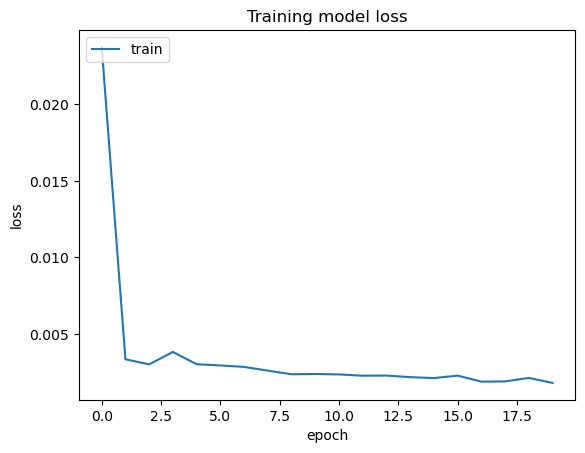

In [11]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [12]:
# testData = pd.read_csv('GS.csv')
# testData = testData.dropna()
testData = test_data.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(614, 60, 1)

In [13]:
y_pred = model.predict(X_test)
y_pred

20/20 [==============================] - 10s 98ms/step


array([[0.9316929 ],
       [0.92824024],
       [0.9253477 ],
       [0.92429304],
       [0.92463034],
       [0.9258184 ],
       [0.9270963 ],
       [0.92908335],
       [0.93104076],
       [0.9324469 ],
       [0.9334828 ],
       [0.9344664 ],
       [0.9353213 ],
       [0.9361452 ],
       [0.9373031 ],
       [0.9383338 ],
       [0.9393328 ],
       [0.9403216 ],
       [0.9422173 ],
       [0.9442811 ],
       [0.946016  ],
       [0.94759494],
       [0.9500378 ],
       [0.952745  ],
       [0.9554451 ],
       [0.95795935],
       [0.9593423 ],
       [0.9594527 ],
       [0.9583674 ],
       [0.95640826],
       [0.9522222 ],
       [0.94671845],
       [0.94128424],
       [0.9364152 ],
       [0.93269247],
       [0.93033886],
       [0.929186  ],
       [0.92886716],
       [0.92919713],
       [0.93001026],
       [0.9310697 ],
       [0.9314483 ],
       [0.93042445],
       [0.9283855 ],
       [0.92493844],
       [0.9204321 ],
       [0.9151296 ],
       [0.910

In [14]:
predicted_price = sc.inverse_transform(y_pred)

In [15]:
#Get root mean sqaure error (RMSE)
rmse = np.sqrt(np.mean((predicted_price-y_test)**2))
rmse

25.831728536651365

In [16]:
# Calculate mean absolute error
mae = np.mean(np.abs(predicted_price - y_test))
mae

20.18436548130217

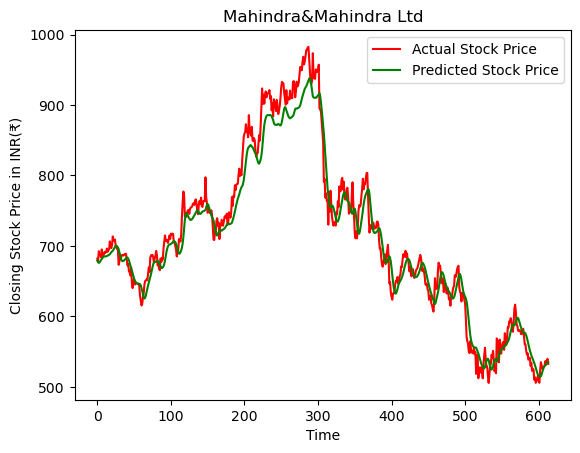

In [26]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Mahindra&Mahindra Ltd')
plt.xlabel('Time')
plt.ylabel('Closing Stock Price in INR(₹)')
plt.legend()
plt.show()